## Display Features

In [26]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

from xml.etree.ElementTree import fromstring, ElementTree
import xml.etree.ElementTree as ET

In [27]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

# Matches

In [28]:
matches = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches8.csv",
    index_col=0,
)

In [29]:
matches.head()

,Date,LeagueID,LeagueName,MatchID,HomeTeamID,HomeTeamLongName,HomeTeamShortName,AwayTeamID,AwayTeamLongName,AwayTeamShortName,HomeGoal,AwayGoal,TotalGoals,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomeBuildUpPlaySpeed,HomeBuildUpPlayPassing,HomeChanceCreationPassing,HomeChanceCreationCrossing,HomeChanceCreationShooting,HomeDefencePressure,HomeDefenceAggression,HomeDefenceTeamWidth,AwayBuildUpPlaySpeed,AwayBuildUpPlayPassing,AwayChanceCreationPassing,AwayChanceCreationCrossing,AwayChanceCreationShooting,AwayDefencePressure,AwayDefenceAggression,AwayDefenceTeamWidth,Result
0,2010,1,Belgium Jupiler League,665626,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,3,2,5,72.0,72.0,72.0,74.0,70.0,71.0,75.0,68.0,72.0,78.0,74.0,72.0,72.0,68.0,72.0,68.0,69.0,70.0,70.0,70.0,72.0,70.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,Home Win
1,2010,1,Belgium Jupiler League,838635,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,2,2,4,72.0,74.0,70.0,71.0,60.0,72.0,69.0,68.0,68.0,72.0,74.0,65.0,72.0,68.0,67.0,72.0,68.0,70.0,72.0,72.0,72.0,70.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,Draw
2,2010,1,Belgium Jupiler League,838544,9986,Sporting Charleroi,CHA,8342,Club Brugge KV,CLB,0,5,5,55.0,63.0,62.0,64.0,64.0,63.0,66.0,62.0,61.0,72.0,63.0,65.0,72.0,68.0,70.0,72.0,72.0,64.0,72.0,72.0,70.0,72.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,40,50,45,43,60,70,70,70,35,40,45,50,45,60,70,70,Away Win
3,2010,1,Belgium Jupiler League,838714,8203,KV Mechelen,MEC,8342,Club Brugge KV,CLB,0,1,1,70.0,64.0,63.0,66.0,65.0,66.0,65.0,66.0,63.0,66.0,66.0,72.0,72.0,68.0,67.0,70.0,68.0,72.0,70.0,72.0,72.0,69.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,65,60,50,40,50,60,70,60,35,40,45,50,45,60,70,70,Away Win
4,2010,1,Belgium Jupiler League,665737,9997,Sint-Truidense VV,STT,8342,Club Brugge KV,CLB,1,1,2,68.0,70.0,65.0,64.0,65.0,66.0,63.0,67.0,64.0,62.0,73.0,72.0,72.0,68.0,70.0,70.0,68.0,69.0,70.0,72.0,71.0,69.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,50,50,50,50,50,50,50,35,40,45,50,45,60,70,70,Draw


In [30]:
X = matches.loc [:, 'HomePlayer1': 'AwayPlayer11']
y = matches['Result'].to_frame()

In [31]:
y['Result'] = y['Result'].replace('Home Win', 1)
y['Result'] = y['Result'].replace('Away Win', -1)
y['Result'] = y['Result'].replace('Draw', 0)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaled_X = scaler.fit_transform(X)

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

In [40]:
principal_components = pca.fit_transform(scaled_X)

Text(0, 0.5, 'Second Principal Component')

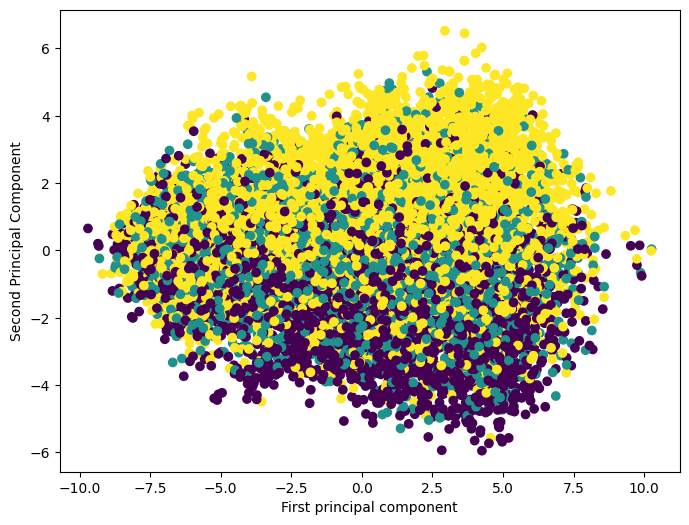

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1],c=y['Result'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')